In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [3]:
df = df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


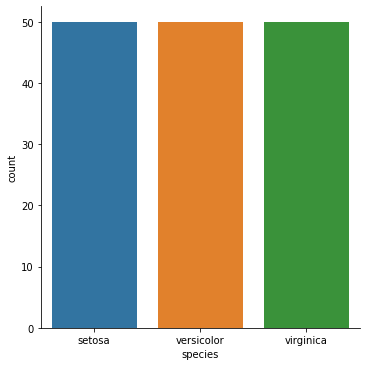

In [5]:
sns.catplot(data=df,x="species",kind='count')

<AxesSubplot:>

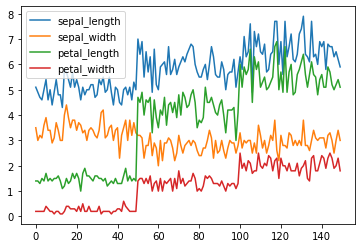

In [6]:
df.plot()

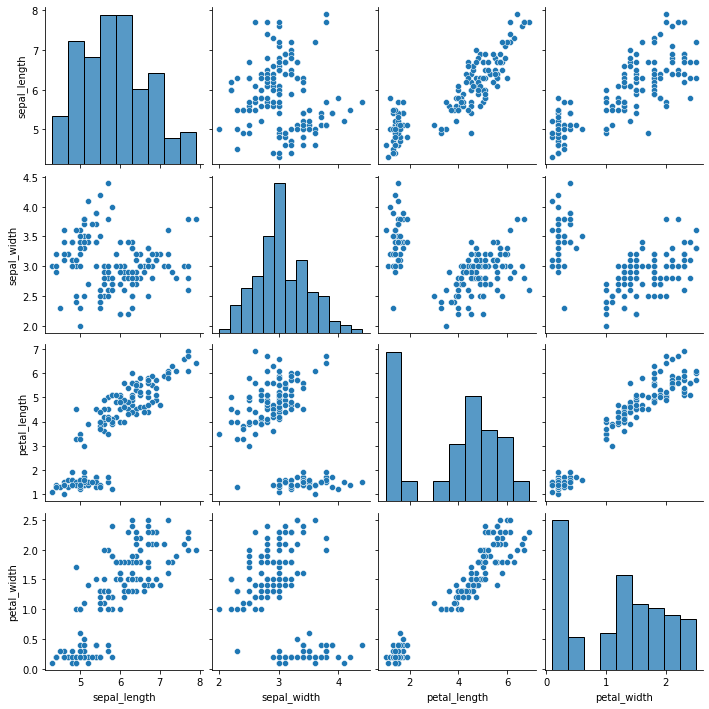

In [7]:
sns.pairplot(data=df)

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

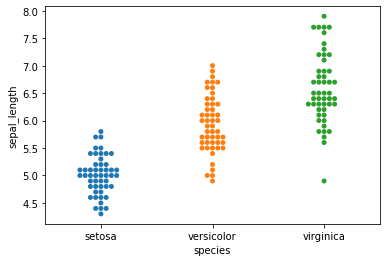

In [8]:
sns.swarmplot(data=df,x="species",y='sepal_length')

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["label"]=le.fit_transform(df['species'])

In [10]:
le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
x=df.drop(columns=['species','label'])
y=df['label']

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
from  sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='multinomial')
model.fit(xtrain,ytrain)

F:\Installed\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [14]:
ypred=model.predict(xtest)

Accuracy is : 1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



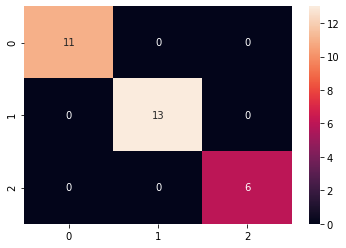

In [15]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
acc=accuracy_score(ytest,ypred)
print("Accuracy is :",acc)
cm=confusion_matrix(ytest,ypred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

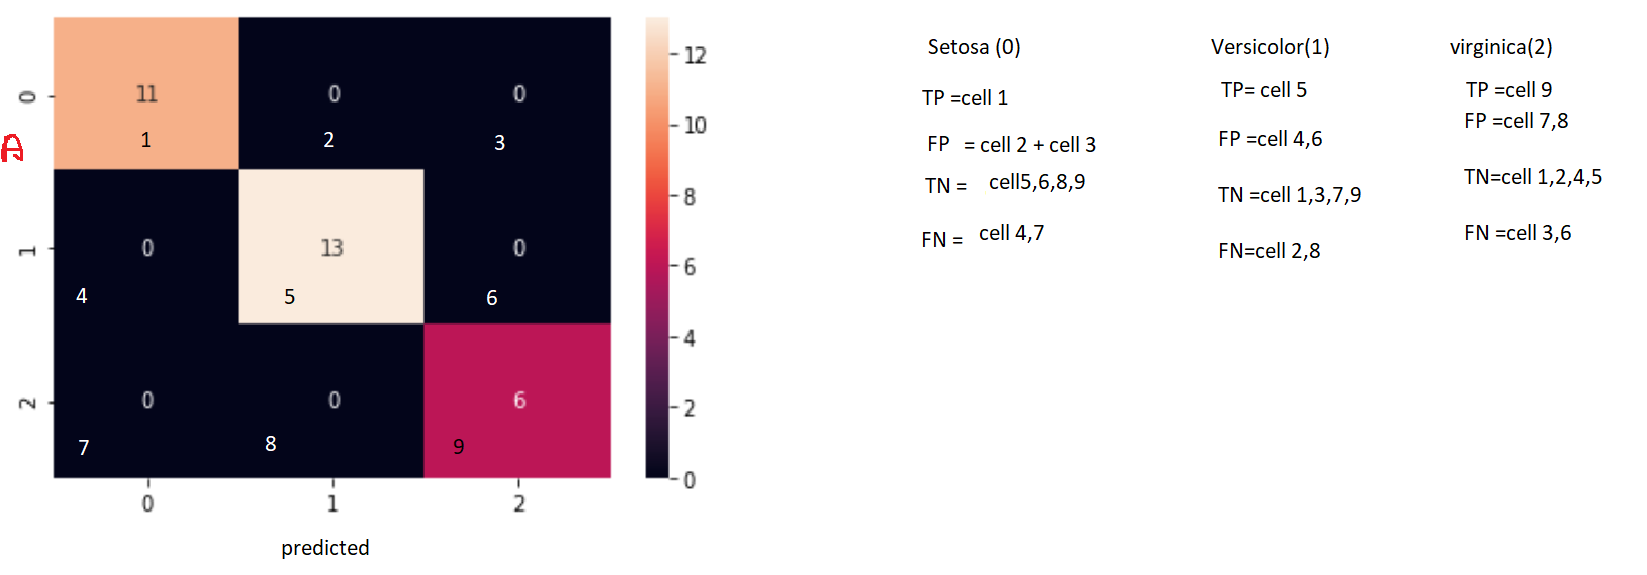